# Clustering

### Clustering (Unsupervised Machine Learning (x))

Mengelompokkan data yang tidak memiliki label, mendeteksi pola hubungan dan kesamaan di seluruh sampel data.  

Clustering dibagi ke dalam 5 keompok:
1. Hirarki
2. Non-hirarki
3. Exclusive Clustering

1 nilai/ cluster tidak boleh ?
Decity Based -> metode clustering yang mempunyai hubungan dengan ?

Contoh K-Means:
- K (kluster/kelompok)
- menentukan titik pusat kluster (centroid) -> dipakai untuk mengidentifikasi kelompok.
- jarak cluster di ukur ke tiap-tiap titik point.
- jarak terdekat bisa menjadi sebuah kluster.
- bisa menjumlahkan jumlah klsuternya.
- data outliers tetep dimasukan.
- tidak cocok untuk data yang berbentuk kategorical.
- langkah-langkah -> ada centroid, melakukan klustering berdsrkan pusatnya.
- Kelemahan -> bisa menyebabkan loss function (error/bias yang berada di dalam model klusternya).

(semakin kecil loss function, maka model semakin baik).
local converge -> untuk mengecilkan loss functionnya.

Contoh DBSCAN:
- tidak bisa menentukan jumlah klsuternya
- adanya epsilon -> membuat lingkaran-lingkaran kecil, dan jika lingkaran" trsbt berdekatan maka bisa membntuk sebuah kluster.
- data outliers ditanda dengan -1

Note Tambahan:
- ketika ada data kategorikal maka bisa menggunakan method (k-Modes)
- dalam algoritma ada fungsi objektif yang digunakan untuk siluet.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.metrics import davies_bouldin_score, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
plt.style.use("fivethirtyeight")

In [ ]:
data = pd.read_csv('/content/Dataset-Praktikum (2).csv')
data.head()

,IDPelanggan,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
0,1,Laki,19,15,39
1,2,Laki,21,15,81
2,3,Perempuan,20,16,6
3,4,Perempuan,23,16,77
4,5,Perempuan,31,17,40


# EDA

In [ ]:
data.shape

(200, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   IDPelanggan                 200 non-null    int64 
 1   Kelamin                     200 non-null    object
 2   Usia                        200 non-null    int64 
 3   Pendapatan (juta Rp)        200 non-null    int64 
 4   Rating_pengeluaran (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.isnull().sum() #-> untuk mengecek missing value

,0
IDPelanggan,0
Kelamin,0
Usia,0
Pendapatan (juta Rp),0
Rating_pengeluaran (1-100),0


In [ ]:
data.describe()

,IDPelanggan,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
data.describe(include="object") #describe kolom kategorikal

,Kelamin
count,200
unique,2
top,Perempuan
freq,112


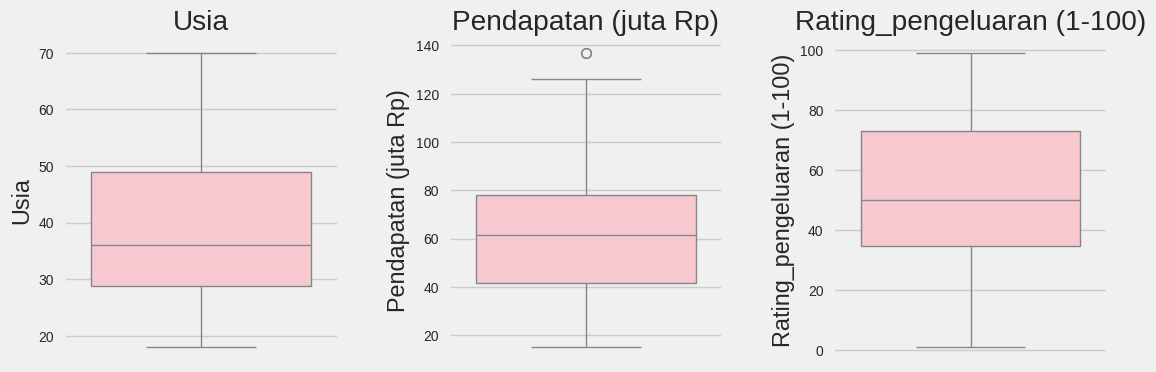

In [ ]:
from re import sub
import matplotlib.pyplot as plt
import seaborn as sns

def box_plot(data):
  #Definisikan variabel yang akan divisualisasikan
  variables = ["Usia", "Pendapatan (juta Rp)", "Rating_pengeluaran (1-100)"]

  #Buat figure dan axes untuk subplot dengan ukuran 1*3
  fig, axes = plt.subplots(1, 3, figsize = (12, 4)) #sesuaikan ukuran figure
  fig.subplots_adjust(hspace=0.4, wspace=0.4) #atur jarak antar subplot

  #loop/iterasi melalui setiap variabel dan buat boxplot
  for i, var in enumerate(variables):
    sns.boxplot(y=var, data=data, color="pink", ax=axes[i]) # perhatikan perubahan disini
    axes[i].set_title(var) # tambahkan judul untuk setiap plot

  # Tampilkan plot
  plt.show()

# Tampilkan plot
box_plot(data)

In [ ]:
data.drop(['IDPelanggan'], axis=1, inplace=True)
data.head()

,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
0,Laki,19,15,39
1,Laki,21,15,81
2,Perempuan,20,16,6
3,Perempuan,23,16,77
4,Perempuan,31,17,40


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Kelamin'] = le.fit_transform(data['Kelamin'])
data.head()

,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [ ]:
# Scalling
# instantiate
scaler = MinMaxScaler()

# fit_transform
x_scaled = scaler.fit_transform(data)
x_scaled

array([[0.        , 0.01923077, 0.        , 0.3877551 ],
       [0.        , 0.05769231, 0.        , 0.81632653],
       [1.        , 0.03846154, 0.00819672, 0.05102041],
       [1.        , 0.09615385, 0.00819672, 0.7755102 ],
       [1.        , 0.25      , 0.01639344, 0.39795918],
       [1.        , 0.07692308, 0.01639344, 0.76530612],
       [1.        , 0.32692308, 0.02459016, 0.05102041],
       [1.        , 0.09615385, 0.02459016, 0.94897959],
       [0.        , 0.88461538, 0.03278689, 0.02040816],
       [1.        , 0.23076923, 0.03278689, 0.7244898 ],
       [0.        , 0.94230769, 0.03278689, 0.13265306],
       [1.        , 0.32692308, 0.03278689, 1.        ],
       [1.        , 0.76923077, 0.04098361, 0.14285714],
       [1.        , 0.11538462, 0.04098361, 0.7755102 ],
       [0.        , 0.36538462, 0.04098361, 0.12244898],
       [0.        , 0.07692308, 0.04098361, 0.79591837],
       [1.        , 0.32692308, 0.04918033, 0.34693878],
       [0.        , 0.03846154,

# MODELLING

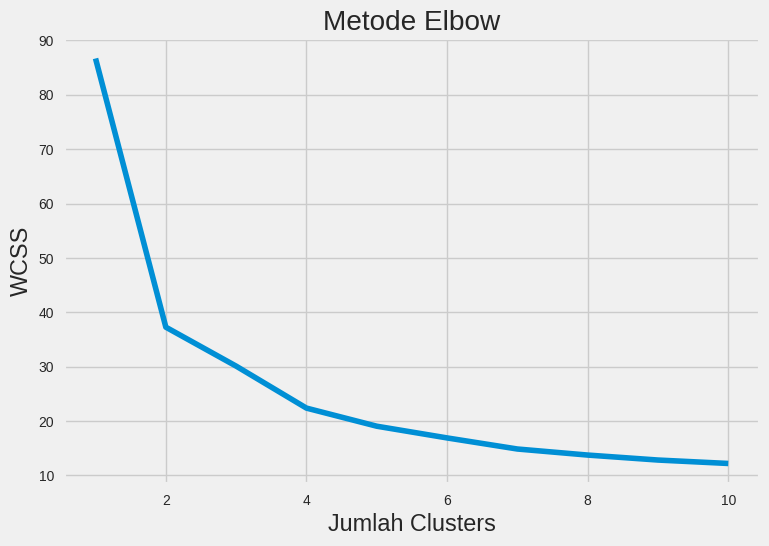

In [ ]:
# Edometer -> buat mencari data yg sesuai dengan klusternya.
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title("Metode Elbow")
plt.xlabel("Jumlah Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
# Menjalankan K-Means Clustering ke dataset
model1 = KMeans(n_clusters=2, init="k-means++", random_state=42)
y_pred1 = model1.fit_predict(x_scaled)

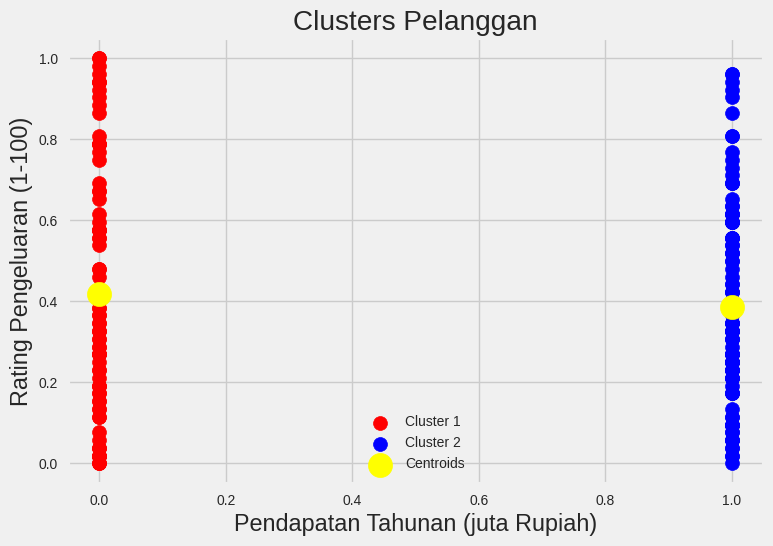

In [ ]:
# Visualisasi Hasil Clusters
plt.scatter(x_scaled[y_pred1 == 0, 0], x_scaled[y_pred1 == 0, 1],
            s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(x_scaled[y_pred1 == 1, 0], x_scaled[y_pred1 == 1, 1],
            s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(model1.cluster_centers_[:, 0], model1.cluster_centers_[:, 1],
            s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters Pelanggan')
plt.xlabel('Pendapatan Tahunan (juta Rupiah)')
plt.ylabel('Rating Pengeluaran (1-100)')
plt.legend()
plt.show()

In [ ]:
# Membuat objek DBSCAN dengan parameter epsilon dan jumlah minimum sampel
model2 = DBSCAN(eps=1, min_samples=5)

# Melakukan clustering
model2.fit(x_scaled)

# Mendapatkan label klaster untuk setiap data (-1 menandakan nosie)
y_pred2 = model2.labels_
y_pred2

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0])

In [ ]:
# Menambahkan label tersebut menjadi kolom baru di dataset.
data['Hasil_cluster'] = model2.labels_
data.head()

,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100),Hasil_cluster
0,0,19,15,39,0
1,0,21,15,81,0
2,1,20,16,6,1
3,1,23,16,77,1
4,1,31,17,40,1


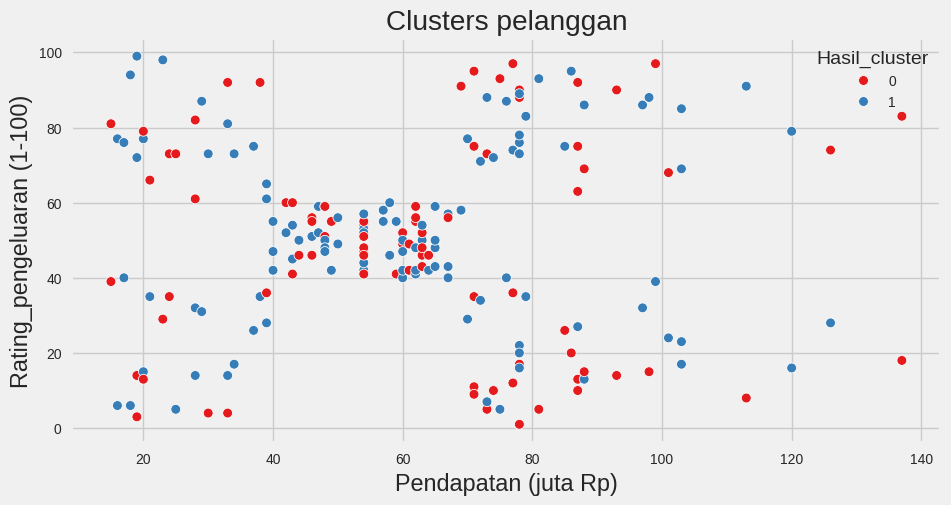

In [ ]:
plt.figure(figsize=(10,5))

sns.scatterplot(x = 'Pendapatan (juta Rp)', y = 'Rating_pengeluaran (1-100)',
                hue = 'Hasil_cluster', data = data, palette = 'Set1', s = 50)
plt.title('Clusters pelanggan')
plt.show()

# 1. Silhoutte_score

In [ ]:
# Menghitung silhoutte_score algoritma k-means (mendekati 1 semakin bagus)

Evaluasi_KMeans = silhouette_score(x_scaled, y_pred1)
print("Silhouette score K-Means: ", Evaluasi_KMeans)

Silhouette score K-Means:  0.5194624832665107


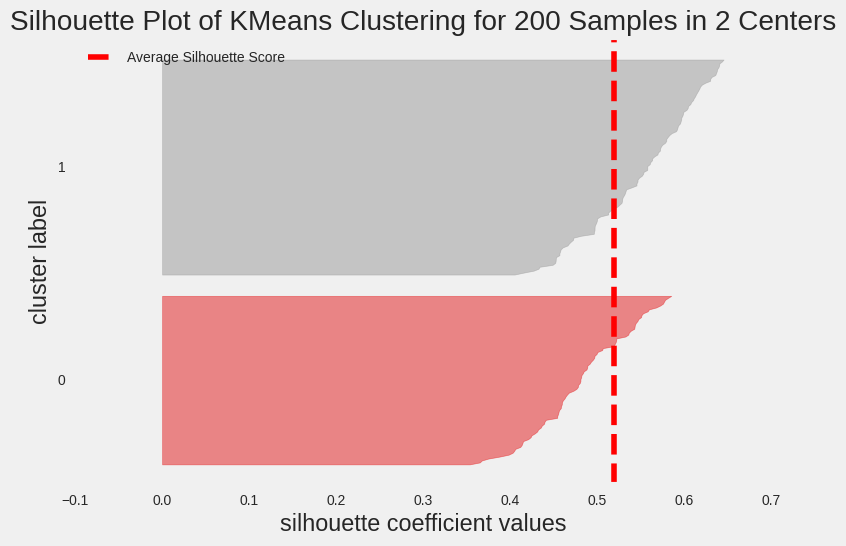

In [ ]:
# membuat silhouette visualitation algoritma k-means
silhouette_viz = SilhouetteVisualizer(model1)
silhouette_viz.fit(x_scaled)
plt.grid(False)
silhouette_viz.show()
plt.show()

In [ ]:
# Menghitung Silhoutte_score algoritma db-scan
Evaluasi_DBScan = silhouette_score(x_scaled, y_pred2)
print("Silhouette score DB-Scan: ", Evaluasi_DBScan)

Silhouette score DB-Scan:  0.5194624832665107


# 2. Davies-Bouldin Index (DBI)

In [ ]:
# Menghitung Davies-Bouldin Index (DBI) algoritma k-means
dbi_score1 = davies_bouldin_score(x_scaled, y_pred1)
print("Davies-Bouldin Index (DBI) K-Means: ", dbi_score1)

Davies-Bouldin Index (DBI) K-Means:  0.8172534497318451


In [ ]:
# Menghitung Davies-Bouldin Index (DBI) algoritma DBScan
dbi_score2 = davies_bouldin_score(x_scaled, y_pred2)
print("Davies-Bouldin Index (DBI) DBScan: ", dbi_score2)

Davies-Bouldin Index (DBI) DBScan:  0.8172534497318451


Note Tambahan

- bisa mempengaruhi hasil akhir paramodelnya (hyper parameter)
- tida mempengaruhi hasil akhir paramodelnya (parameter)